# Analysis of Information Transfer Rate

In [1]:
import torch
import pandas as pd
from pathlib import Path
import sys
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
# notebook location
project_root = Path().resolve().parent.parent
sys.path.insert(0, str(project_root))
print("Added to path:", project_root)
from utils.general_utils import open_file, load_all_h5files_from_folder
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from ft_comparisons import load_results
from utils.III_results_analysis.utils import load_all_results,mean_std_confusion_matrices

from utils.I_data_preparation.experimental_config import ORIGINAL_LABELS
models_dire = Path(r"/scratch2/gspacone/sensors_2026_final/models")


Added to path: /home/gspacone/Desktop/SilentWear


In [2]:
subjects = ["S01", "S02", "S03", "S04"]
conditions = ["silent", "vocalized"]

In [3]:
def compute_itr(M=9,T=1400,P=0.8):
    """
    Function to compute information transfer rate
    M : number of tasks
    T: window_lenght
    P: classification accuracy
    """

    a = np.log2(M)
    b = P*np.log2(P)
    c = np.log2((1-P)/(M-1))
    c = (1-P)*c

    ITR = 60*(a+b+c)/T

    return ITR

In [4]:
all_results = load_all_results(models_dire/"inter_session_win_sweep", subjects_to_consider = ["S01", "S02", "S03", "S04"], conditions_to_consider = ["silent","vocalized"])

In [5]:
all_results

,subject,condition,model_type_folder,model_name,include_rest,balanced_acc_mean,balanced_acc_vals,balanced_acc_std,mean_cm,std_cm,run_cfg_signature_exact,run_cfg_signature_seeds,run_path,model_id,run_cfg,train_label_map,win_size_ms
0,S01,silent,speechnet_base,speechnet_base,True,0.587917,"[0.6038888888888888, 0.5377777777777778, 0.622...",0.036223,"[[0.9645833333333332, 0.006666666666666667, 0....","[[0.0035843021946011084, 0.003118047822311618,...",3fbc5d7fbf38ab4c50f19478da600538a70119bbf100e1...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_1,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1000
1,S01,silent,speechnet_base,speechnet_base,True,0.565602,"[0.5958333333333333, 0.540138888888889, 0.5608...",0.022986,"[[0.9570833333333333, 0.005833333333333334, 0....","[[0.006795627679291716, 0.0015590239111558089,...",3fbc5d7fbf38ab4c50f19478da600538a70119bbf100e1...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_2,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1200
2,S01,silent,speechnet_base,speechnet_base,True,0.617778,"[0.6627777777777778, 0.5558333333333333, 0.634...",0.045274,"[[0.9566666666666667, 0.0175, 0.00125, 0.015, ...","[[0.015855247992033694, 0.01698651425886626, 0...",3fbc5d7fbf38ab4c50f19478da600538a70119bbf100e1...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_3,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400
3,S01,silent,speechnet_base,speechnet_base,True,0.595787,"[0.6291666666666667, 0.5155555555555557, 0.642...",0.056998,"[[0.9587500000000001, 0.012083333333333335, 0....","[[0.004677071733467417, 0.0061520096084305845,...",3fbc5d7fbf38ab4c50f19478da600538a70119bbf100e1...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_4,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1600
4,S01,silent,speechnet_base,speechnet_base,True,0.613009,"[0.6018055555555555, 0.5747222222222221, 0.662...",0.036700,"[[0.9570833333333333, 0.011666666666666667, 0....","[[0.007660323462854258, 0.004249182927993988, ...",3fbc5d7fbf38ab4c50f19478da600538a70119bbf100e1...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_5,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,S04,vocalized,speechnet_padded,speechnet_padded,True,0.841713,"[0.7204166666666667, 0.9236111111111112, 0.881...",0.087507,"[[0.9954166666666667, 0.0004166666666666667, 0...","[[0.0032808366141715696, 0.0005892556509887896...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_5,"{'base_cfg': {'condition': 'vocalized', 'cv': ...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1200
116,S04,vocalized,speechnet_padded,speechnet_padded,True,0.829167,"[0.7458333333333333, 0.9061111111111112, 0.835...",0.065589,"[[0.9925, 0.0008333333333333334, 0.00041666666...","[[0.006123724356957951, 0.0011785113019775792,...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_6,"{'base_cfg': {'condition': 'vocalized', 'cv': ...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400
117,S04,vocalized,speechnet_padded,speechnet_padded,True,0.841898,"[0.7620833333333334, 0.8990277777777776, 0.864...",0.058163,"[[0.9904166666666666, 0.0020833333333333333, 0...","[[0.001178511301977554, 0.0015590239111558089,...",20e239540d38eccca51c7d1ee

In [6]:
new_rows = []
for idx, row in all_results.iterrows():
    newrow = {}
    balanced_accuracies_values = row["balanced_acc_vals"]
    win_size = row["win_size_ms"]/1000
    itrs = []
    for p in balanced_accuracies_values:
        itrs.append(compute_itr(M=9, T=win_size, P=p))
    
    newrow["ITRs"] = np.array(itrs)
    newrow["ITRs_means"] = np.mean(np.array(itrs))
    newrow["ITRs_stds"] = np.std(np.array(itrs))

    new_rows.append(newrow)



In [7]:
all_results = pd.concat((all_results, pd.DataFrame(new_rows)), axis=1)

In [8]:
def plot_one(ax, x, y, yerr, title):
    x = np.asarray(x); y = np.asarray(y); yerr = np.asarray(yerr)
    order = np.argsort(x)
    x, y, yerr = x[order], y[order], yerr[order]

    ax.errorbar(x, y, yerr=yerr, fmt="o-", capsize=3, linewidth=1, markersize=4)
    ax.set_title(title)
    ax.set_xlabel("Window size [ms]")
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis="x", labelrotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")


from matplotlib.ticker import MultipleLocator

def plot_one_with_itr(ax, x, y_acc, yerr_acc, y_itr, yerr_itr, title, 
                      xlabel_fontsize=12,
                      ylabel_fontsize=12, 
                      title_fontsize=15):

    x = np.asarray(x)
    y_acc = np.asarray(y_acc) * 100
    yerr_acc = np.asarray(yerr_acc) * 100
    y_itr = np.asarray(y_itr)
    yerr_itr = np.asarray(yerr_itr)

    order = np.argsort(x)
    x = x[order]
    y_acc = y_acc[order]
    yerr_acc = yerr_acc[order]
    y_itr = y_itr[order]
    yerr_itr = yerr_itr[order]

    # ---- Accuracy (left axis) ----
    ax.errorbar(
        x, y_acc, yerr=yerr_acc,
        fmt="o-", capsize=2, linewidth=1,
        markersize=3, color="tab:blue"
    )

    ax.set_ylabel("Accuracy (\%)", color="tab:blue", fontsize=ylabel_fontsize)
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax.tick_params(axis="y", colors="tab:blue", labelsize=ylabel_fontsize-2)

    # X ticks: every window size
    ax.set_xticks(x)
    ax.set_xticklabels([str(int(v)) for v in x], rotation=45, ha="right", fontsize=xlabel_fontsize-2)
    ax.set_xlabel("Window size [ms]", fontsize=xlabel_fontsize)

    # Very light grid, matching ticks
    ax.grid(
        True, which="major", axis="both",
        linewidth=0.4, alpha=0.25
    )

    # ---- ITR (right axis) ----
    ax2 = ax.twinx()
    ax2.errorbar(
        x, y_itr, yerr=yerr_itr,
        fmt="o-", capsize=2, linewidth=1,
        markersize=3, color="tab:red"
    )

    ax2.set_ylabel("ITR (bit/min)", color="tab:red", fontsize=ylabel_fontsize)
    ax2.set_ylim(0, 170)
    ax2.yaxis.set_major_locator(MultipleLocator(10))
    ax2.tick_params(axis="y", colors="tab:red", labelsize=ylabel_fontsize-2)

    # Title on the right axis (cleaner in multi-panel layouts)
    ax2.set_title(title, fontsize=title_fontsize)

    # Keep grids aligned (only left axis draws grid)
    ax2.grid(False)


In [9]:
speechnet_res = all_results[all_results["model_name"] == "speechnet_base"]

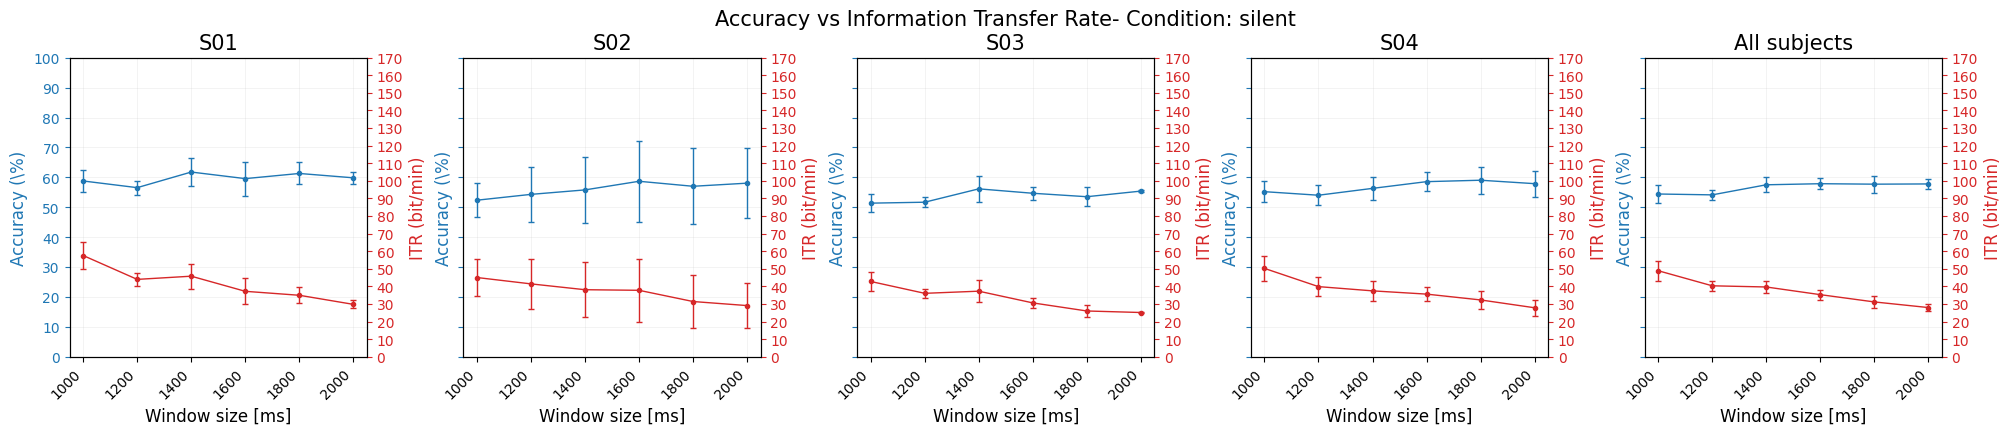

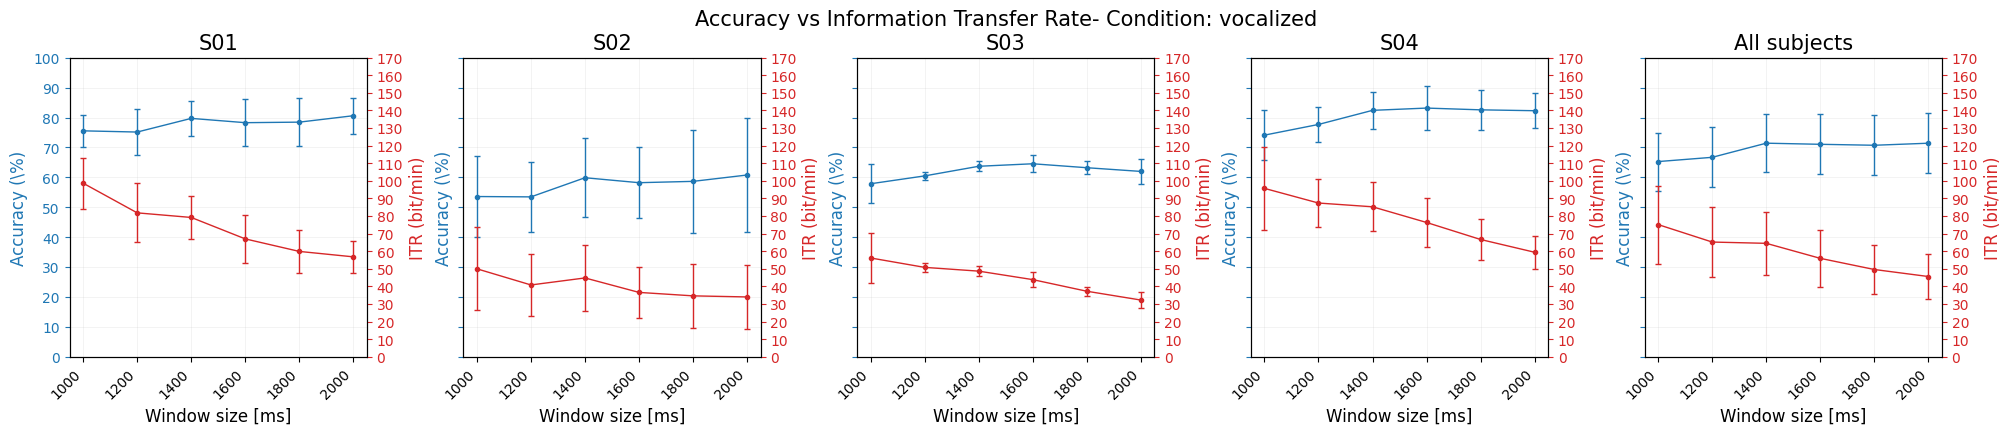

In [10]:
for condition in conditions:
    # Filter the dataframe by condition
    df_condition = speechnet_res[speechnet_res["condition"]== condition]

    windows = np.sort(df_condition["win_size_ms"].unique())
    subjects = list(subjects)
    n_subj = len(subjects)

    fig, axs = plt.subplots(
        1, n_subj + 1,
        figsize=(4*(n_subj+1), 4),
        sharey=True,
        constrained_layout=True
    )
    axs = np.atleast_1d(axs)



    # --- per subject ---
    for i, subject in enumerate(subjects):
        df_s = df_condition[df_condition["subject"] == subject].sort_values("win_size_ms")
        plot_one_with_itr(
            axs[i],
            df_s["win_size_ms"].to_numpy(),
            df_s["balanced_acc_mean"].to_numpy(),
            df_s["balanced_acc_std"].to_numpy(),
            df_s["ITRs_means"].to_numpy(),
            df_s["ITRs_stds"].to_numpy(),
            str(subject)
        )

    # --- aggregate across subjects ---
    groups = df_condition.groupby(["win_size_ms"]) 
    all_subjects_means = [] 
    all_subjects_stds = [] 
    all_subjects_itrs = []
    all_subjects_itrs_std = []
    win_sizes = [] 
    for win_size, group in groups: 
        win_sizes.append(group["win_size_ms"].unique()[0]) 
        mean_across_subs = group["balanced_acc_mean"].mean() 
        itrs_across_subs = group["ITRs_means"].mean()

        all_subjects_means.append(mean_across_subs) 
        all_subjects_stds.append(np.std(group["balanced_acc_mean"].values))

        all_subjects_itrs.append(itrs_across_subs) 
        all_subjects_itrs_std.append(np.std(group["ITRs_means"].values))


    # If you prefer SEM instead of std across subjects:
    # yerr = agg["std"].to_numpy() / np.sqrt(agg["n"].to_numpy())
    

    plot_one_with_itr(axs[-1],win_sizes,np.array(all_subjects_means),np.array(all_subjects_stds), np.array(all_subjects_itrs), np.array(all_subjects_itrs_std), "All subjects")


    # Optional if balanced acc is [0,1]:
    # axs[0].set_ylim(0, 1)

    fig.suptitle(f"Accuracy vs Information Transfer Rate- Condition: {condition}", y=1.05, fontsize=15)
    plt.show()

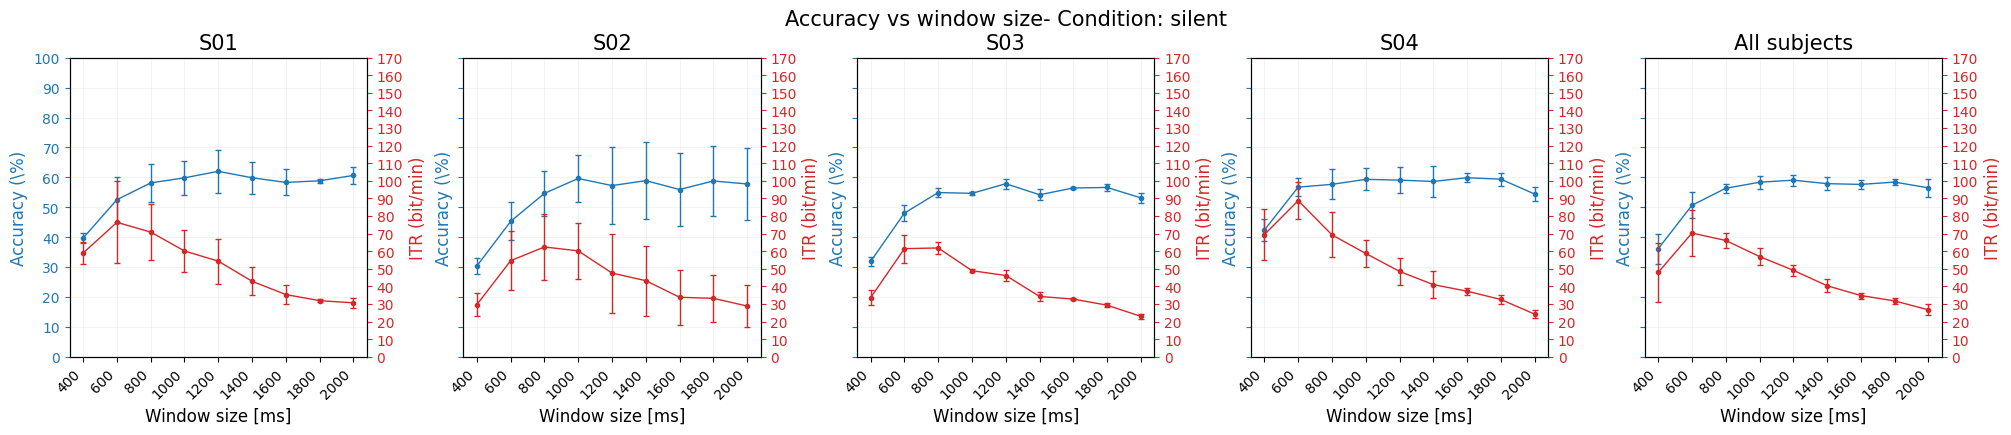

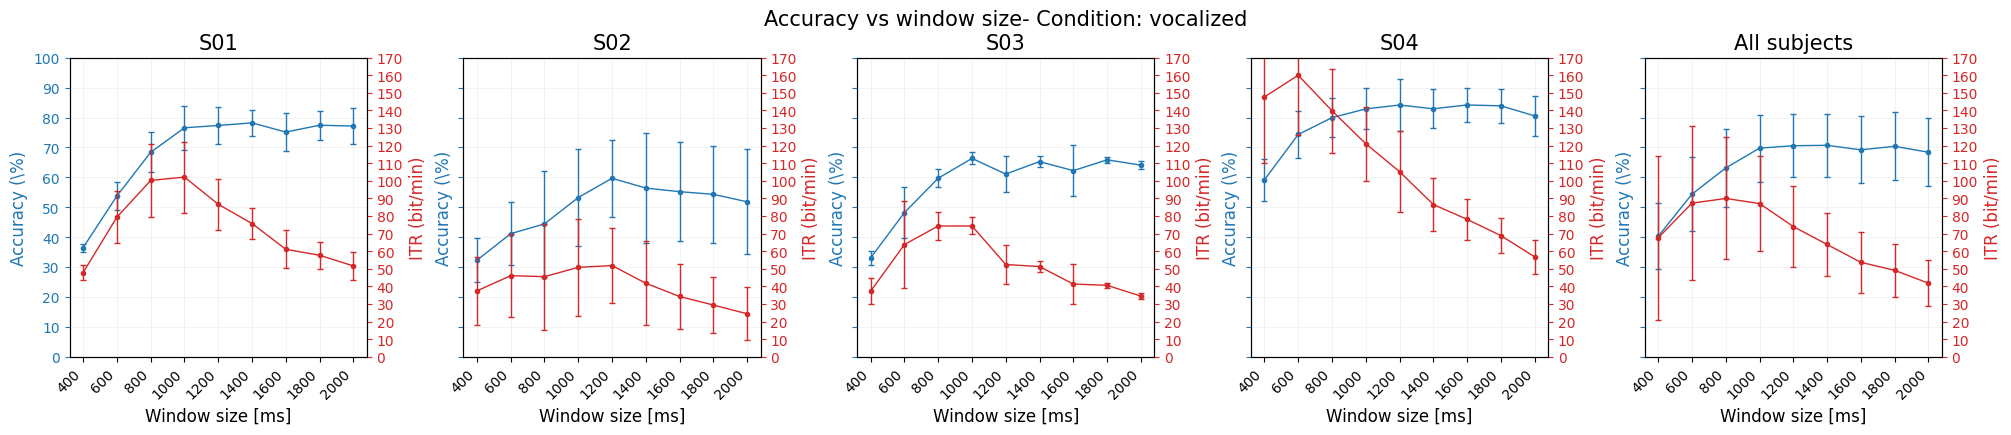

In [11]:
from matplotlib.ticker import MultipleLocator
speechnet_pad_res = all_results[all_results["model_name"] == "speechnet_padded"]

for condition in conditions:
    # Filter the dataframe by condition
    df_condition = speechnet_pad_res[speechnet_pad_res["condition"]== condition]

    windows = np.sort(df_condition["win_size_ms"].unique())
    subjects = list(subjects)
    n_subj = len(subjects)

    fig, axs = plt.subplots(
        1, n_subj + 1,
        figsize=(4*(n_subj+1), 4),
        sharey=True,
        constrained_layout=True
    )
    axs = np.atleast_1d(axs)



    # --- per subject ---
    for i, subject in enumerate(subjects):
        df_s = df_condition[df_condition["subject"] == subject].sort_values("win_size_ms")
        plot_one_with_itr(
            axs[i],
            df_s["win_size_ms"].to_numpy(),
            df_s["balanced_acc_mean"].to_numpy(),
            df_s["balanced_acc_std"].to_numpy(),
            df_s["ITRs_means"].to_numpy(),
            df_s["ITRs_stds"].to_numpy(),
            str(subject)
        )
        axs[i].set_xticklabels(
            [str(int(w)) for w in windows],
            rotation=45, ha="right"
        )
    # --- aggregate across subjects ---
    groups = df_condition.groupby(["win_size_ms"]) 
    all_subjects_means = [] 
    all_subjects_stds = [] 
    all_subjects_itrs = []
    all_subjects_itrs_std = []
    win_sizes = [] 
    for win_size, group in groups: 
        win_sizes.append(group["win_size_ms"].unique()[0]) 
        mean_across_subs = group["balanced_acc_mean"].mean() 
        itrs_across_subs = group["ITRs_means"].mean()

        all_subjects_means.append(mean_across_subs) 
        all_subjects_stds.append(np.std(group["balanced_acc_mean"].values))

        all_subjects_itrs.append(itrs_across_subs) 
        all_subjects_itrs_std.append(np.std(group["ITRs_means"].values))


    # If you prefer SEM instead of std across subjects:
    # yerr = agg["std"].to_numpy() / np.sqrt(agg["n"].to_numpy())
    

    plot_one_with_itr(axs[-1],win_sizes,np.array(all_subjects_means),np.array(all_subjects_stds), np.array(all_subjects_itrs), np.array(all_subjects_itrs_std), "All subjects")

    axs[-1].set_xticklabels([str(int(w)) for w in windows],rotation=45, ha="right")

    # Optional if balanced acc is [0,1]:
    # axs[0].set_ylim(0, 1)

    fig.suptitle(f"Accuracy vs window size- Condition: {condition}", y=1.05, fontsize=15)
    plt.show()

# Extract CMs

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

In [13]:
# Insert window size to consider
win_size_ms = 1400

res_sel_window = speechnet_pad_res[speechnet_pad_res["win_size_ms"]==win_size_ms]

In [14]:
res_sel_window

,subject,condition,model_type_folder,model_name,include_rest,balanced_acc_mean,balanced_acc_vals,balanced_acc_std,mean_cm,std_cm,run_cfg_signature_exact,run_cfg_signature_seeds,run_path,model_id,run_cfg,train_label_map,win_size_ms,ITRs,ITRs_means,ITRs_stds
11,S01,silent,speechnet_padded,speechnet_padded,True,0.598704,"[0.6411111111111111, 0.5234722222222222, 0.631...",0.053340,"[[0.9616666666666668, 0.0037500000000000003, 0...","[[0.02296585629920109, 0.0010206207261596577, ...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_6,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400,"[49.350056488444224, 31.79708333035867, 47.786...",42.977854,7.931728
26,S01,vocalized,speechnet_padded,speechnet_padded,True,0.782130,"[0.8263888888888888, 0.7225, 0.7975]",0.043783,"[[0.9758333333333334, 0.009583333333333334, 0....","[[0.0023570226039551605, 0.004823265376162594,...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_6,"{'base_cfg': {'condition': 'vocalized', 'cv': ...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400,"[84.99396386250396, 63.66012943656353, 78.6653...",75.773150,8.946387
41,S02,silent,speechnet_padded,speechnet_padded,True,0.588981,"[0.43875, 0.7529166666666667, 0.5752777777777778]",0.128624,"[[0.9408333333333333, 0.011250000000000001, 0....","[[0.026424683326179896, 0.009842509842514764, ...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_6,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400,"[21.30115541034351, 69.51653560767049, 39.0930...",43.303584,19.907739
56,S02,vocalized,speechnet_padded,speechnet_padded,True,0.564213,"[0.3033333333333333, 0.6816666666666666, 0.707...",0.184774,"[[0.8245833333333333, 0.004166666666666667, 0....","[[0.20875706907525043, 0.0005892556509887897, ...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_6,"{'base_cfg': {'condition': 'vocalized', 'cv': ...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400,"[8.339894878130728, 56.24422279970443, 60.9038...",41.829324,23.756886
71,S03,silent,speechnet_padded,speechnet_padded,True,0.541898,"[0.5576388888888889, 0.5170833333333333, 0.550...",0.017757,"[[0.9670833333333334, 0.0008333333333333334, 0...","[[0.020138409955990973, 0.0005892556509887896,...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_6,"{'base_cfg': {'condition': 'silent', 'cv': {'m...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400,"[36.53352753172216, 30.943595931244793, 35.586...",34.354538,2.442692
86,S03,vocalized,speechnet_padded,speechnet_padded,True,0.652731,"[0.6541666666666668, 0.6740277777777778, 0.63]",0.018003,"[[0.9645833333333335, 0.004166666666666667, 0....","[[0.03876119909852576, 0.004124789556921527, 0...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_2026_final/models/i...,model_6,"{'base_cfg': {'condition': 'vocalized', 'cv': ...","{0: 'rest', 1: 'up', 2: 'down', 3: 'left', 4: ...",1400,"[51.519997817480494, 54.910721191145925, 47.53...",51.323376,3.012535
101,S04,silent,speechnet_padded,speechnet_padded,True,0.586204,"[0.52125, 0.6495833333333334, 0.5877777777777777]",0.052404,"[[0.9791666666666666, 0.007083333333333334, 0....","[[0.019904284854160282, 0.007523112535528246, ...",20e239540d38eccca51c7d1eed54fd0b8b9929408059f5...,cd7a39fc349b06c0ed99e3a32f30e0e43d8e25601f07bc...,/scratch2/gspacone/sensors_202

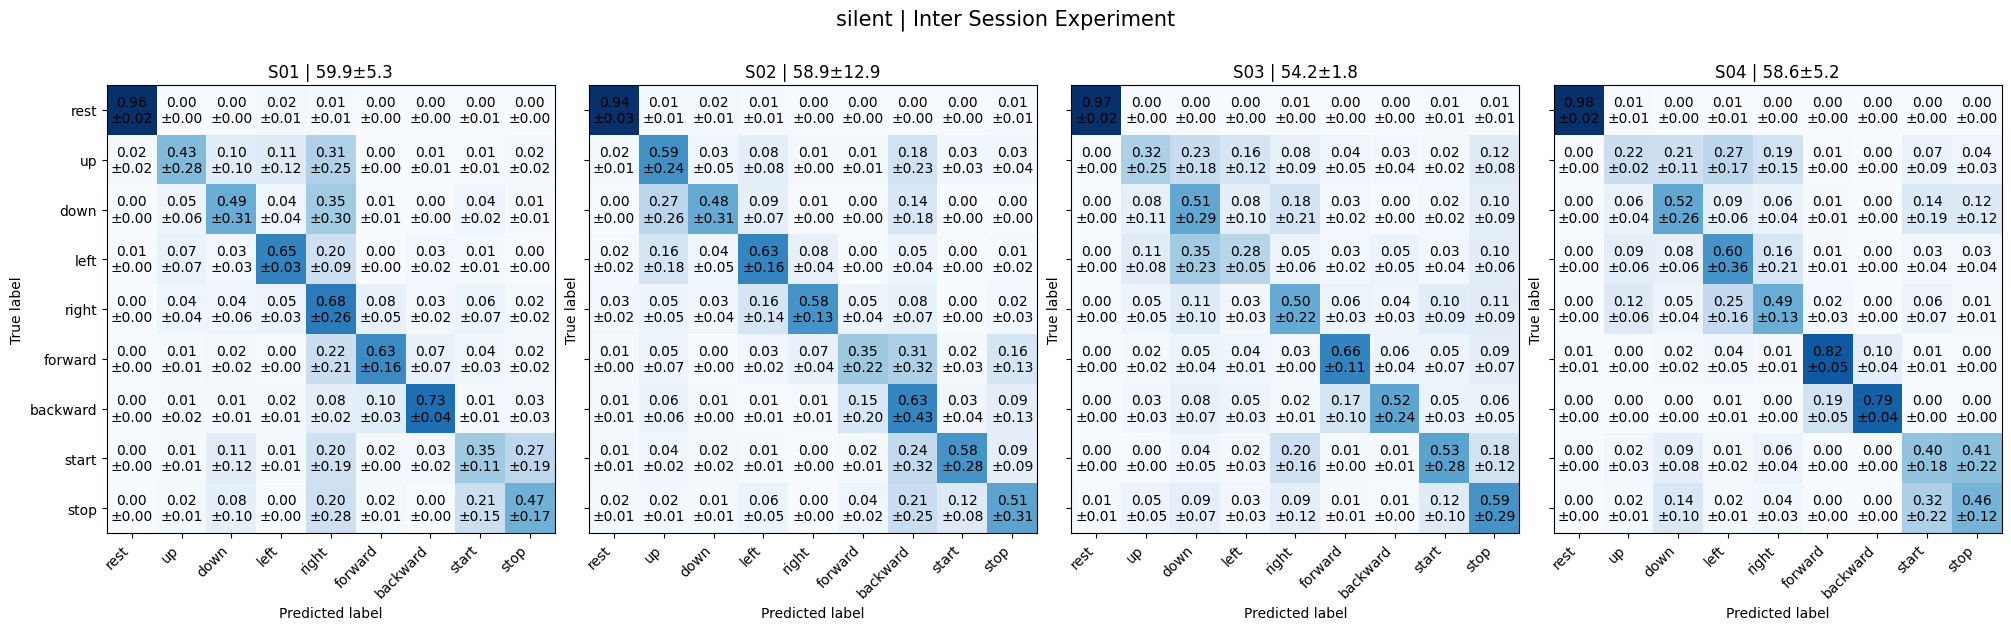

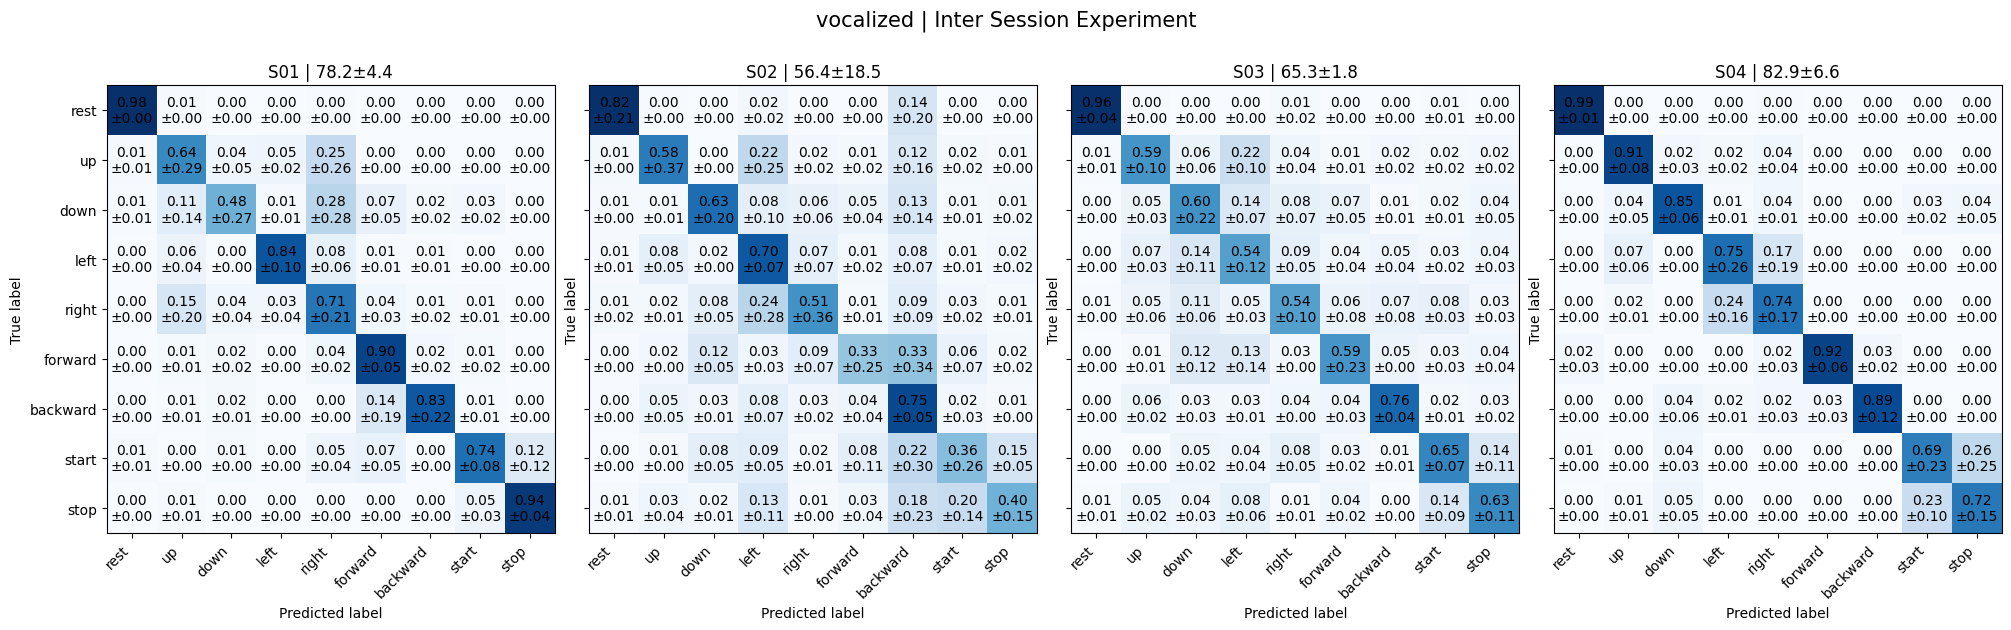

In [15]:

for condition in conditions:
    res_sel_window_condition = res_sel_window[res_sel_window["condition"]==condition]
    
    
    fig, axs = plt.subplots(1, n_subj, figsize=(20, 20), constrained_layout=True, sharey=True)
    axs = np.atleast_1d(axs)  # handles n_subj == 1

    for subject_id, subject in enumerate(subjects):
        # Extract subject
        curr_subj = res_sel_window_condition[res_sel_window_condition["subject"]==subject]
        run_path = curr_subj["run_path"].iloc[0]
        # extract csv summary path
        df = pd.read_csv(f"{run_path}/cv_summary.csv")

        cm_mean, cm_std = mean_std_confusion_matrices(df["confusion_matrix"])

        ax = axs[subject_id]
        disp_lables = list(curr_subj["train_label_map"].iloc[0].values())
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=disp_lables)

        # heatmap from mean (no default numbers)
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False, include_values=False)
       
        mean_sub = np.round(np.mean(curr_subj['balanced_acc_vals'].iloc[0])*100, 1)
        std_sub = np.round(np.std(curr_subj['balanced_acc_vals'].iloc[0])*100, 1)
        title = f"{subject} | {mean_sub}±{std_sub}"
        ax.set_title(title, fontsize=12)  # one title per subject
        ax.tick_params(axis="x", labelrotation=45, labelsize=10)
        ax.set_xticklabels(ax.get_xticklabels(), ha="right")
        ax.tick_params(axis="y", labelsize=10)
        # annotate mean ± std
        for (i, j), m in np.ndenumerate(cm_mean):
            s = cm_std[i, j]
            ax.text(j, i, f"{m:.2f}\n±{s:.2f}", ha="center", va="center", fontsize=10)


    plt.suptitle(f"{condition} | Inter Session Experiment", y=0.65, fontsize=15)
    plt.show()


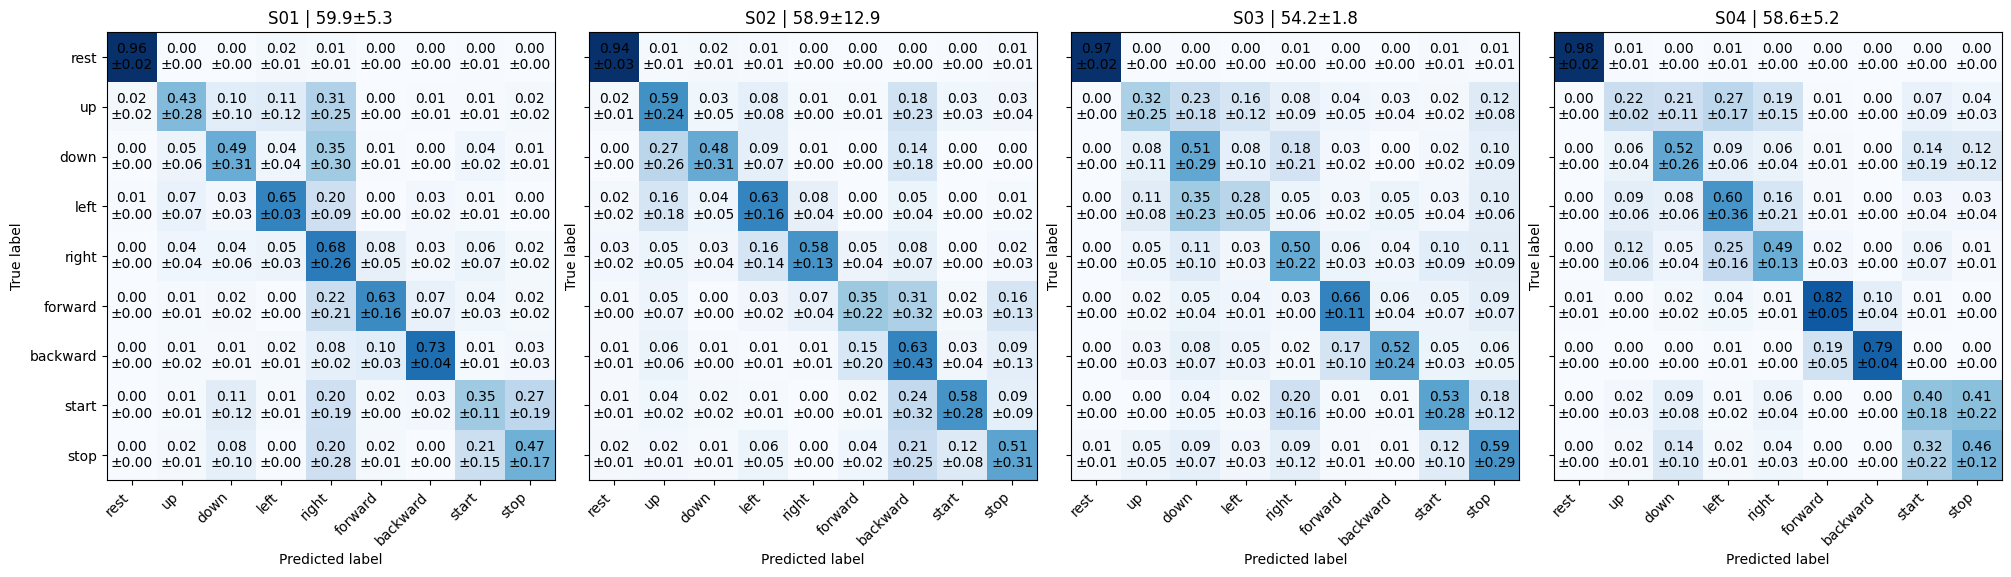

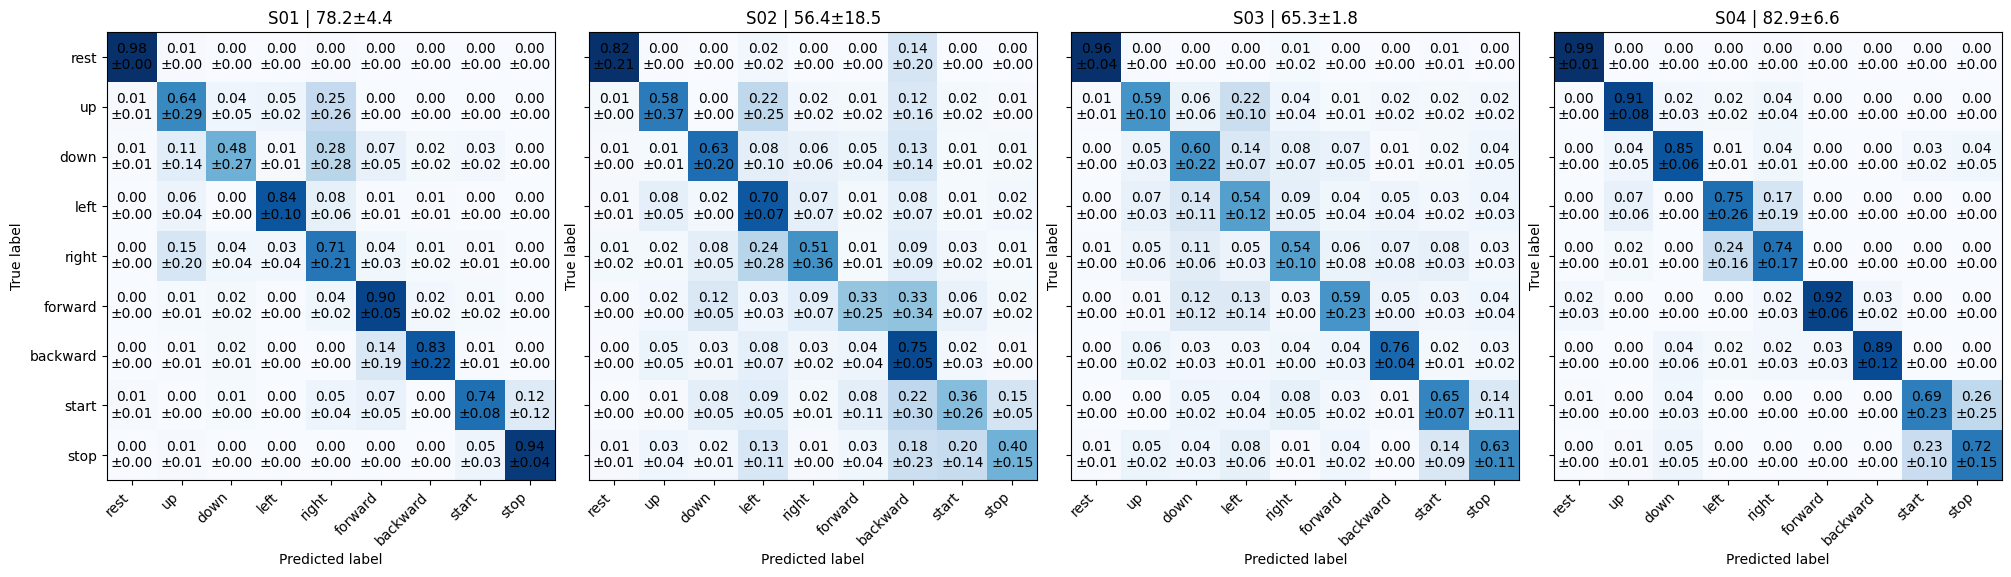

In [16]:

for condition in conditions:
    res_sel_window_condition = res_sel_window[res_sel_window["condition"]==condition]
    
    
    fig, axs = plt.subplots(1, n_subj, figsize=(20, 20), constrained_layout=True, sharey=True)
    axs = np.atleast_1d(axs)  # handles n_subj == 1

    for subject_id, subject in enumerate(subjects):
        # Extract subject
        curr_subj = res_sel_window_condition[res_sel_window_condition["subject"]==subject]
        run_path = curr_subj["run_path"].iloc[0]
        # extract csv summary path
        df = pd.read_csv(f"{run_path}/cv_summary.csv")

        cm_mean, cm_std = mean_std_confusion_matrices(df["confusion_matrix"])

        ax = axs[subject_id]
        disp_lables = list(curr_subj["train_label_map"].iloc[0].values())
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=disp_lables)

        # heatmap from mean (no default numbers)
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False, include_values=False)
       
        mean_sub = np.round(np.mean(curr_subj['balanced_acc_vals'].iloc[0])*100, 1)
        std_sub = np.round(np.std(curr_subj['balanced_acc_vals'].iloc[0])*100, 1)
        title = f"{subject} | {mean_sub}±{std_sub}"
        ax.set_title(title, fontsize=12)  # one title per subject
        ax.tick_params(axis="x", labelrotation=45, labelsize=10)
        ax.set_xticklabels(ax.get_xticklabels(), ha="right")
        ax.tick_params(axis="y", labelsize=10)
        # annotate mean ± std
        for (i, j), m in np.ndenumerate(cm_mean):
            s = cm_std[i, j]
            ax.text(j, i, f"{m:.2f}\n±{s:.2f}", ha="center", va="center", fontsize=10)

In [ ]:
summary_model = {}

In [ ]:
summary_subjects = res_sel_window_condition[["subject", "balanced_acc_mean", "balanced_acc_std", "balanced_acc_vals"]]
mean_std_fmt = []
for idx, row in summary_subjects.iterrows():
    mean = np.round(np.mean(row["balanced_acc_vals"])*100, 1)
    std = np.round(np.std(row["balanced_acc_vals"])*100, 1)
    mean_std_fmt.append(f"{mean}±{std}")

mean_std_dict = {"mean_std_perc" : mean_std_fmt}
summary_subjects = pd.concat((summary_subjects, pd.DataFrame(mean_std_dict, index=summary_subjects.index)), axis=1).reset_index(drop=True)

# Plots for Paper

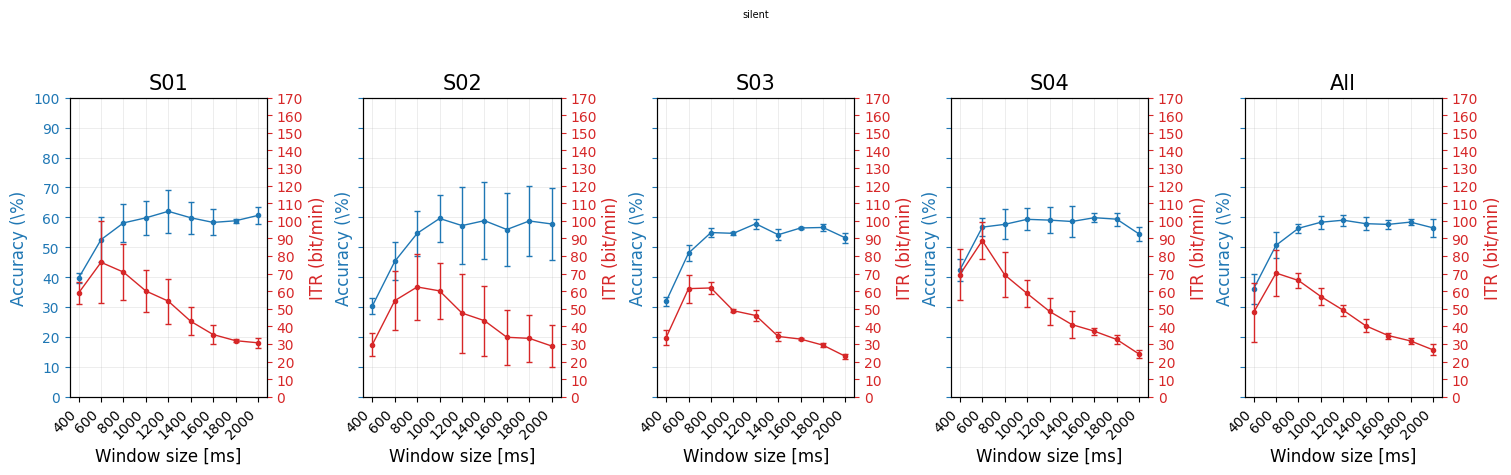

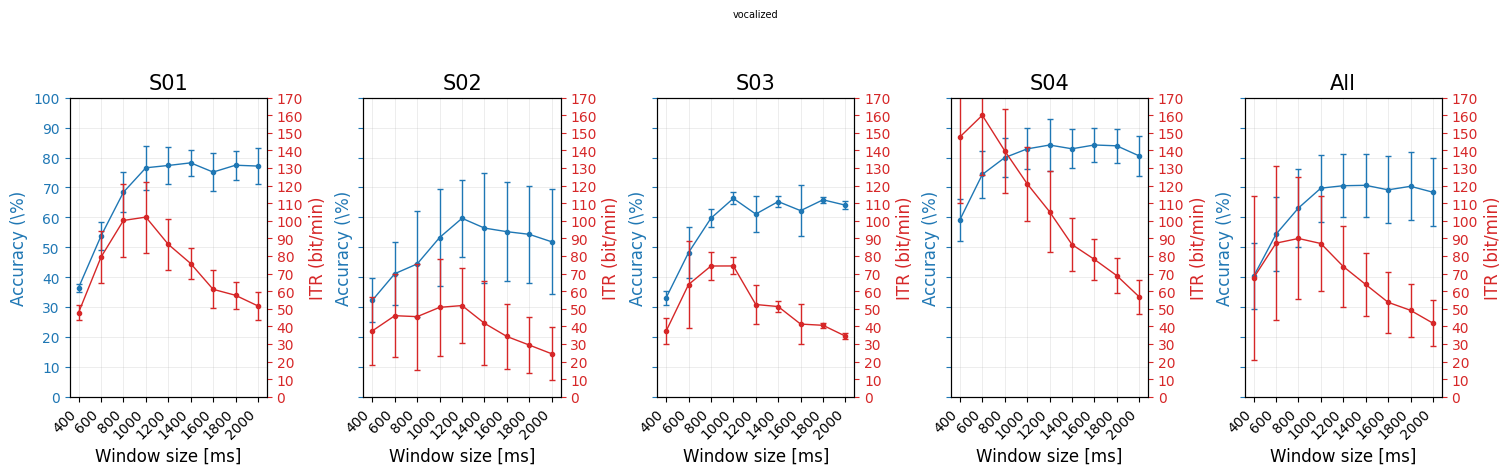

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --- IEEE half-column styling ---
plt.rcParams.update({
    "font.size": 7,
    "axes.labelsize": 7,
    "axes.titlesize": 7,
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "lines.linewidth": 1.0,
})

HALF_COL_W = 15 # inches (IEEE half column)
H = 4           # small height to fit IEEE

speechnet_pad_res = all_results[all_results["model_name"] == "speechnet_padded"]

for condition in conditions:
    df_condition = speechnet_pad_res[speechnet_pad_res["condition"] == condition]

    windows = np.sort(df_condition["win_size_ms"].unique())
    subjects_list = list(subjects)
    n_subj = len(subjects_list)

    fig, axs = plt.subplots(
        1, n_subj + 1,
        figsize=(HALF_COL_W, H),
        sharey=True,
        constrained_layout=True
    )
    axs = np.atleast_1d(axs)

    # --- per subject ---
    for i, subject in enumerate(subjects_list):
        df_s = (
            df_condition[df_condition["subject"] == subject]
            .sort_values("win_size_ms")
        )

        plot_one_with_itr(
            axs[i],
            df_s["win_size_ms"].to_numpy(),
            df_s["balanced_acc_mean"].to_numpy(),
            df_s["balanced_acc_std"].to_numpy(),
            df_s["ITRs_means"].to_numpy(),
            df_s["ITRs_stds"].to_numpy(),
            str(subject),
        )

        axs[i].set_xticks(windows)
        axs[i].set_xticklabels(
            [str(int(w)) for w in windows],
            rotation=45, ha="right"
        )
        axs[i].grid(True, linewidth=0.4, alpha=0.4)

    # --- aggregate across subjects ---
    groups = df_condition.groupby("win_size_ms")

    win_sizes = []
    acc_means, acc_stds = [], []
    itrs_means, itrs_stds = [], []

    for win_size, g in groups:
        win_sizes.append(win_size)
        acc_means.append(g["balanced_acc_mean"].mean())
        acc_stds.append(np.std(g["balanced_acc_mean"].values))
        itrs_means.append(g["ITRs_means"].mean())
        itrs_stds.append(np.std(g["ITRs_means"].values))

    win_sizes = np.array(win_sizes)
    order = np.argsort(win_sizes)

    plot_one_with_itr(
        axs[-1],
        win_sizes[order],
        np.array(acc_means)[order],
        np.array(acc_stds)[order],
        np.array(itrs_means)[order],
        np.array(itrs_stds)[order],
        "All",
    )

    axs[-1].set_xticks(windows)
    axs[-1].set_xticklabels(
        [str(int(w)) for w in windows],
        rotation=45, ha="right"
    )
    axs[-1].grid(True, linewidth=0.4, alpha=0.4)

    fig.suptitle(f"{condition}", y=1.15, fontsize=7)

    plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator

def plot_subjects_plus_average_single_box(df_condition, subjects, windows, title,
                                          acc_col_mean="balanced_acc_mean",
                                          acc_col_std="balanced_acc_std",
                                          itr_col_mean="ITRs_means",
                                          itr_col_std="ITRs_stds"):
    subjects = list(subjects)
    windows = np.sort(np.asarray(windows))
    nW = len(windows)
    pos_map = {w: j for j, w in enumerate(windows)}

    # ---------- build "All subjects" aggregate (mean across subjects + std across subjects) ----------
    g = df_condition.groupby("win_size_ms")
    agg = g.agg(
        acc_mean=(acc_col_mean, "mean"),
        itr_mean=(itr_col_mean, "mean"),
    ).reset_index()

    # std across subjects of the per-subject MEANS (like you did before)
    acc_std_across = g[acc_col_mean].apply(lambda v: np.std(v.values)).reset_index(name="acc_std")
    itr_std_across = g[itr_col_mean].apply(lambda v: np.std(v.values)).reset_index(name="itr_std")
    agg = agg.merge(acc_std_across, on="win_size_ms").merge(itr_std_across, on="win_size_ms")

    # order by windows
    agg = agg.set_index("win_size_ms").reindex(windows).reset_index()

    # ---------- plotting setup (one box) ----------
    plt.rcParams.update({
        "font.size": 9,
        "axes.labelsize": 9,
        "axes.titlesize": 9,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "lines.linewidth": 1.0,
    })

    blocks = subjects + ["Average"]
    n_blocks = len(blocks)

    gap = 0.5     # spacing between blocks (x-index units)
    block = nW + gap

    fig, ax = plt.subplots(1, 1, figsize=(7.2, 2.6), constrained_layout=True)           #7.2, 2.6
    ax2 = ax.twinx()

    # common axes
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax2.set_ylim(0, 170)
    ax2.yaxis.set_major_locator(MultipleLocator(10))

    # very light grid (single grid only)
    ax.grid(True, which="major", linewidth=0.35, alpha=0.20)
    ax2.grid(False)

    # ticks/labels across all blocks
    # xticks, xticklabels, centers = [], [], []
    centers = []
    for bi, name in enumerate(blocks):
        start = bi * block

        # alternating band background
        face = "#f4f4f4" if (bi % 2 == 1) else "#ffffff"
        ax.axvspan(start - 0.5, start + nW - 0.5, color=face, zorder=0)

        # separator line between blocks
        # if bi > 0:
        #     ax.axvline(start - 0.5, linewidth=0.6, alpha=0.35)

        # choose data (subject or aggregate)
        if name != "Average":
            df_s = df_condition[df_condition["subject"] == name].sort_values("win_size_ms")

            xvals = df_s["win_size_ms"].to_numpy()
            order = np.argsort(xvals)
            xvals = xvals[order]

            acc = df_s[acc_col_mean].to_numpy()[order] * 100.0
            acc_std = df_s[acc_col_std].to_numpy()[order] * 100.0

            itr = df_s[itr_col_mean].to_numpy()[order]
            itr_std = df_s[itr_col_std].to_numpy()[order]

        else:
            xvals = agg["win_size_ms"].to_numpy()
            acc = agg["acc_mean"].to_numpy() * 100.0
            acc_std = agg["acc_std"].to_numpy() * 100.0
            itr = agg["itr_mean"].to_numpy()
            itr_std = agg["itr_std"].to_numpy()

        # map each win_size to block-local x position
        x_idx = np.array([pos_map.get(w, np.nan) for w in xvals], dtype=float)
        valid = ~np.isnan(x_idx)
        x_plot = start + x_idx[valid]

        # plot accuracy (left)
        ax.errorbar(
            x_plot, acc[valid], yerr=acc_std[valid],
            fmt="o-", capsize=2, markersize=3,
            color="tab:blue", alpha=0.95
        )

        # plot ITR (right)
        ax2.errorbar(
            x_plot, itr[valid], yerr=itr_std[valid],
            fmt="o-", capsize=2, markersize=3,
            color="tab:red", alpha=0.85
        )

        # # per-block repeated xticks
        # for j, w in enumerate(windows):
        #     xticks.append(start + j)
        #     xticklabels.append(str(int(w)))

        centers.append(start + (nW - 1) / 2)


    label_windows = [400, 800, 1200, 1600, 2000]  # or pick what you want
    label_windows = [w for w in windows if w in label_windows]  # keep only existing

    major_xticks, major_xlabels = [], []
    minor_xticks = []

    for bi, name in enumerate(blocks):
        start = bi * block

        # background band
        ax.axvspan(start - 0.5, start + nW - 0.5,
                color=("#f4f4f4" if bi % 2 else "#ffffff"), zorder=0)

        # separator at the boundary (no gap now)
        # if bi > 0:
        #     ax.axvline(start - 0.5, linewidth=0.6, alpha=0.35)

        # minor ticks at every window
        for j, w in enumerate(windows):
            minor_xticks.append(start + j)

        # major ticks only for selected window labels
        for w in label_windows:
            j = np.where(windows == w)[0][0]
            major_xticks.append(start + j)
            major_xlabels.append(str(int(w)))

    # apply ticks: major labeled, minor unlabeled
    ax.xaxis.set_major_locator(FixedLocator(major_xticks))
    ax.set_xticklabels(major_xlabels, rotation=45, ha="right")

    ax.xaxis.set_minor_locator(FixedLocator(minor_xticks))
    ax.tick_params(axis="x", which="minor", length=2, width=0.5)
    ax.tick_params(axis="x", which="major", length=3, width=0.7)

    # # apply xticks once
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticklabels, rotation=45, ha="right")

    # block titles above (subjects + All)
    y_top = ax.get_ylim()[1]
    for c, name in zip(centers, blocks):
        ax.text(c, y_top + 2.0, str(name), ha="center", va="bottom", fontsize=9)

    ax.set_xlim(-0.5, (n_blocks - 1) * block + nW - 0.5)

    ax.set_xlabel("Window size [ms]")
    ax.set_ylabel("Accuracy (%)", color="tab:blue")
    ax2.set_ylabel("ITR (bit/min)", color="tab:red")
    ax.set_title(title, y=1.08)

    return fig, ax, ax2


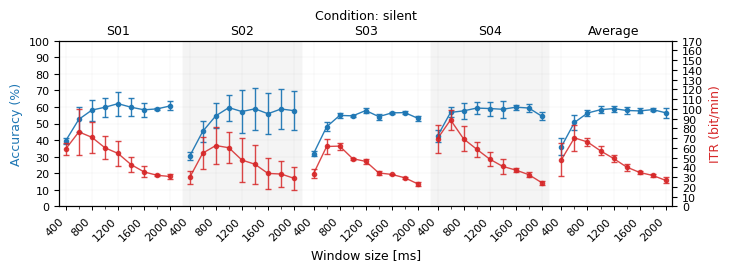

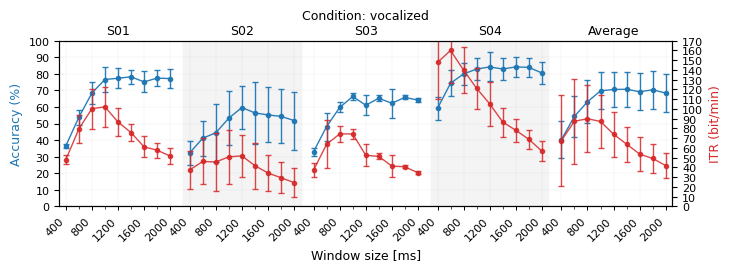

In [23]:
speechnet_pad_res = all_results[all_results["model_name"] == "speechnet_padded"]

for condition in conditions:
    df_condition = speechnet_pad_res[speechnet_pad_res["condition"] == condition]
    windows = np.sort(df_condition["win_size_ms"].unique())

    fig, ax, ax2 = plot_subjects_plus_average_single_box(
        df_condition=df_condition,
        subjects=subjects,          # (4 subjects) -> plus "All" = 5 blocks
        windows=windows,
        title=f"Condition: {condition}",
    )
    plt.show()
